## 1. Importing Libraries

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import csv
import numpy as np

from get_credentials import get_credentials
from extract_playlist import extract_playlist
from artistsgenres_dummies import artistsgenres_dummies

from sklearn import preprocessing

## 2. Import Data

In [2]:
cid,secret = get_credentials()

# # Adding the Playlist link and URI.
# Liked Songs - 4000 songs
songs_to_add_link = "https://open.spotify.com/playlist/5F5yHyXHt6vp2taA7DrEhJ?si=b4f82e9651444f28"
# Gym - 500 songs
playlist_link = "https://open.spotify.com/playlist/5CYdyJ0w4OVc1oitZWQvj3?si=76db4826bb254432"

# # Liked Songs mask - 160 songs
# songs_to_add_link = "https://open.spotify.com/playlist/3ZqPfj9NrumTSN8mANanIK?si=bbded8c33a274d55"
# # Gym mask - 20 songs
# playlist_link = "https://open.spotify.com/playlist/5dFBFbT5ZmJruYvK8IVd6c?si=80cad7f1d80b49cd"

# # Liked (16)
# # songs_to_add_link = "https://open.spotify.com/playlist/3TUNU4evtqUNJmlIrDPNIH?si=29622ac066ea4e21"
# # Gym (2)
# # playlist_link = "https://open.spotify.com/playlist/73cHWYdFwcPNnhUCoFOtLI?si=95e7777d30d74d1c"

# # Spotify Playlist Generator - 16 songs
# playlist_link = "https://open.spotify.com/playlist/7LaicnuGlBjUoHZ5Rd4tjm?si=e9f47ebd992b4d08"
# # NN Test
# # Gym mask - 20 songs
# songs_to_add_link = "https://open.spotify.com/playlist/5dFBFbT5ZmJruYvK8IVd6c?si=80cad7f1d80b49cd"

in txt


In [3]:
df_p = extract_playlist(playlist_link,cid,secret)
df_p.to_csv('Playlist_p.csv', encoding='utf-8', index = False)
print(df_p.shape)

(513, 25)


In [4]:
df_sta = extract_playlist(songs_to_add_link,cid,secret)
print(df_sta.shape)

In [ ]:
df_sta = df_sta.reset_index(drop=True)
df_p = df_p.reset_index(drop=True)

In [ ]:
df_sta.to_csv('Playlist_sta.csv', encoding='utf-8', index = False)
df_p.to_csv('Playlist_p.csv', encoding='utf-8', index = False)
# df.head()

In [ ]:
df_sta['in playlist'] = -2
df_p['in playlist'] = 1

In [ ]:
ip = []

# # df_unlabelled = df_sta_ag.loc[~((df_sta_ag.song_fil.isin(df_p['song_fil']))&(df_sta_ag.artists_fil.isin(df_p['artists_fil']))),:]
for index, row in df_sta.iterrows():
    for index2, row2 in df_p.iterrows():
        if row['song_fil'] == row2['song_fil'] and row['artists_fil'] == row2['artists_fil']:
            print(row['song_fil'], row['artists_fil'])
            in_playlist = index
            ip.append(in_playlist)

print(len(ip))
print(ip)

0
[]


In [ ]:
df_u = df_sta.copy()
df_l = df_p.copy()

df_u = df_u.drop(df_u.index[ip])

df1 = df_u
df2 = df_l

df1['in playlist'] = -2
df2['in playlist'] = 1

df = pd.concat([df1, df2])
df = df.reset_index(drop=True)
print(df1.shape)
print(df2.shape)
print(df.shape)

(16, 26)
(2, 26)
(18, 26)


In [ ]:
df.to_csv('Playlist_df.csv', encoding='utf-8', index = False)

In [ ]:
df.drop(['local','song_fil','artists_fil','album_fil'], 1)

,id,song,artists_info,artists,album,date,time,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genres,popularity,uri,in playlist
0,9,Return of the Mack,"{'ar_name0': 'Mark Morrison', 'ar_name0_fil': ...",Mark Morrison,Return of the Mack,1996-04-22,213093,0.715,0.833,2,...,0.1080,0.00631,0.000000,0.1640,0.612,95.487,[british soul],75,spotify:track:3jDdpx9PMlfMBS5tOBHFm9,-2
1,8,That's All She Wrote,"{'ar_name0': 'T.I.', 'ar_name0_fil': 't.i.', '...","T.I., Eminem",No Mercy,2010-12-02,318360,0.496,0.785,7,...,0.3060,0.03280,0.000000,0.0941,0.357,170.020,"[atl hip hop, dance pop, dirty south rap, gang...",67,spotify:track:6XAA7T9VHcqKQSzjmXAJ8o,-2
2,12,"Balling (feat. Songer, Mr Traumatik, Devilman ...","{'ar_name0': 'Vibe Chemistry', 'ar_name0_fil':...","Vibe Chemistry, Songer, Mr Traumatik, Devilman...","Balling (feat. Songer, Mr Traumatik, Devilman ...",2022-03-24,266207,0.819,0.741,9,...,0.0968,0.05690,0.000000,0.1590,0.514,87.016,"[chill drill, uk alternative hip hop, uk hip h...",66,spotify:track:2WObGIQXhjveq6yuXvf6VQ,-2
3,1,Fire Squad,"{'ar_name0': 'J. Cole', 'ar_name0_fil': 'j. co...",J. Cole,2014 Forest Hills Drive,2014-12-09,288123,0.551,0.755,11,...,0.4190,0.27900,0.000000,0.5080,0.574,175.895,"[conscious hip hop, hip hop, north carolina hi...",65,spotify:track:6sf35vqrEAN8fOFzrKmv9A,-2
4,3,Drugs From Amsterdam,"{'ar_name0': 'Mau P', 'ar_name0_fil': 'mau p',...",Mau P,Drugs From Amsterdam,2022-08-19,235786,0.686,0.928,8,...,0.0527,0.03160,0.727000,0.0576,0.631,124.986,[],65,spotify:track:1uXPu4aSDFPLzyNcH6ASD4,-2
5,14,Got To Give It Up - Pt. 1,"{'ar_name0': 'Marvin Gaye', 'ar_name0_fil': 'm...",Marvin Gaye,Every Great Motown Hit Of Marvin Gaye,1983-08-22,255133,0.855,0.847,2,...,0.0420,0.23400,0.000620,0.3450,0.890,122.644,"[classic soul, funk, indie r&b, motown, northe...",65,spotify:track:7ohR0qPH6f2Vuj2pUNanJG,-2
6,6,Naughty Girl,"{'ar_name0': 'Beyoncé', 'ar_name0_fil': 'beyon...",Beyoncé,Dangerously In Love,2003-06-24,208573,0.588,0.461,6,...,0.1610,0.23700,0.000015,0.0913,0.659,200.053,"[dance pop, pop, r&b]",63,spotify:track:0YGQ3hZcRLC5YX7o0hdmHg,-2
7,15,SOS,"{'ar_name0': 'ABBA', 'ar_name0_fil': 'abba', '...",ABBA,Abba,1975-01-01,202387,0.415,0.713,5,...,0.0278,0.25100,0.001970,0.2890,0.579,125.056,"[europop, swedish pop]",63,spotify:track:6yZv0Nl6BXABbXoPVpfF5y,-2
8,5,Together,"{'ar_name0': 'SIDEPIECE', 'ar_name0_fil': 'sid...",SIDEPIECE,Together,2020-11-13,186341,0.727,0.749,2,...,0.0327,0.18400,0.006660,0.1050,0.466,125.056,"[bass house, edm, electro house, house, pop da...",62,spotify:track:3ydFRJUABULlXklU1M24TV,-2
9,7,Stranger Things (feat. OneRepublic),"{'ar_name0': 'Kygo', 'ar_name0_fil': 'kygo', '...","Kygo, OneRepublic",Kids in Love,2017-11-03,221440,0.604,0.661,0,...,0.0375,0.23400,0.000000,0.0951,0.506,107.016,"[edm, pop, pop dance, tropical house, dance po...",62,spotify:track:4sJqSKPc5fZ5OZ8JiVI44N,-2


## 3. Pre-Processing Data

### Dummies for Artists and Genres

Song Library (Unlabelled Data or Positive Data)

There are 21 unique genres in the playlist.


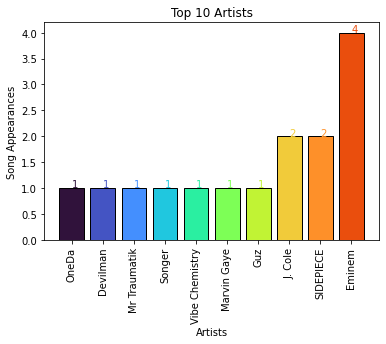

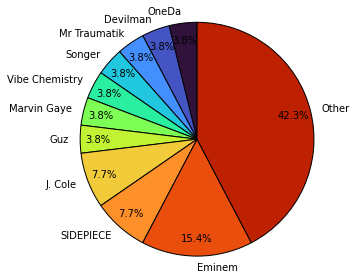

There are 46 unique genres in the playlist.


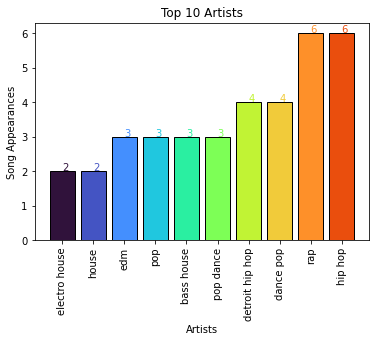

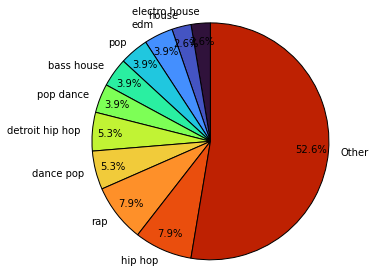

In [ ]:
from artistsgenres_dummies import artistsgenres_dummies
df_sta_ag, sta_num_artists, sta_num_genres = artistsgenres_dummies(df_sta)

Playlist to Update (Labelled Data)

There are 5 unique genres in the playlist.


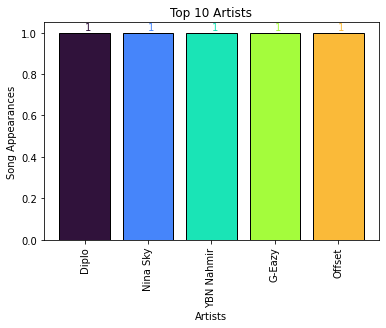

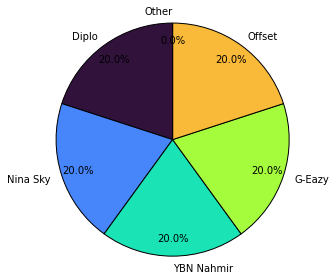

There are 22 unique genres in the playlist.


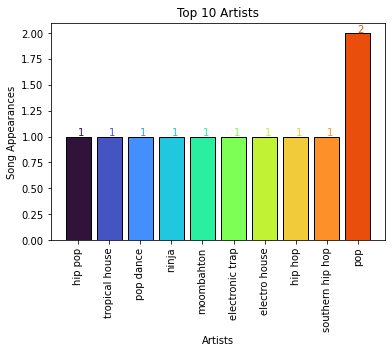

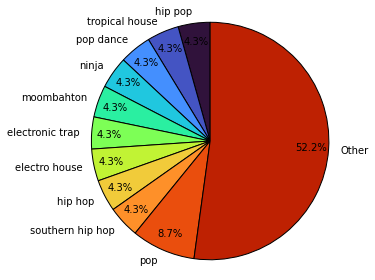

In [ ]:
df_p_ag, p_num_artists, p_num_genres = artistsgenres_dummies(df_p)

Both Playlists (Duplicates Removed)

There are 27 unique genres in the playlist.


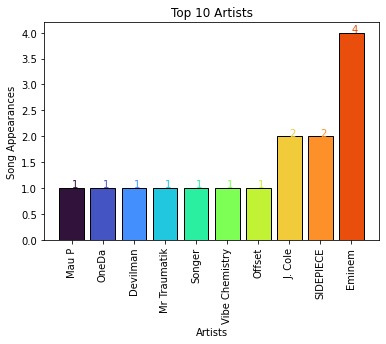

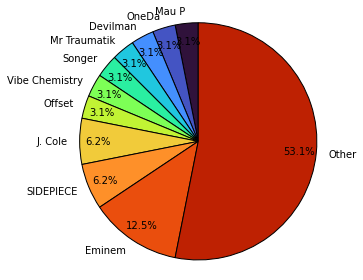

There are 58 unique genres in the playlist.


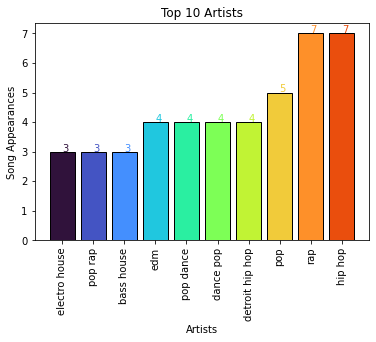

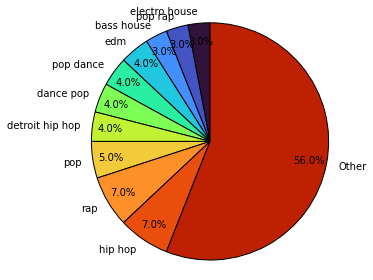

In [ ]:
df_ag, df_num_artists, df_num_genres = artistsgenres_dummies(df)

In [ ]:
df_ag.to_csv('Playlist_df_ag.csv', encoding='utf-8', index = False)

tot1 = df_ag.shape[0]
df_ag = df_ag.drop(df_ag[df_ag['date'] == ''].index)
tot2 = df_ag.shape[0]
tot = tot1-tot2
print("There were %i local songs within both playlists. All are removed as they don't have any song parameters." %tot)

There were 0 local songs within both playlists. All are removed as they don't have any song parameters.


In [ ]:
df_ag = df_ag.reset_index(drop=True)
df_ag

,id,song,song_fil,artists,artists_fil,album,album_fil,date,local,time,...,moombahton,ninja,hip pop,urban contemporary,alabama rap,underground hip hop,vapor trap,viral rap,indie pop rap,oakland hip hop
0,9,Return of the Mack,return of the mack,Mark Morrison,mark morrison,Return of the Mack,return of the mack,1996-04-22,No,213093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,That's All She Wrote,that's all she wrote,"T.I., Eminem","t.i., eminem",No Mercy,no mercy,2010-12-02,No,318360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,"Balling (feat. Songer, Mr Traumatik, Devilman ...",balling - edit,"Vibe Chemistry, Songer, Mr Traumatik, Devilman...","vibe chemistry, songer, mr traumatik, devilman...","Balling (feat. Songer, Mr Traumatik, Devilman ...",balling [edit],2022-03-24,No,266207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,Fire Squad,fire squad,J. Cole,j. cole,2014 Forest Hills Drive,2014 forest hills drive,2014-12-09,No,288123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,Drugs From Amsterdam,drugs from amsterdam,Mau P,mau p,Drugs From Amsterdam,drugs from amsterdam,2022-08-19,No,235786,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,14,Got To Give It Up - Pt. 1,got to give it up - pt. 1,Marvin Gaye,marvin gaye,Every Great Motown Hit Of Marvin Gaye,every great motown hit of marvin gaye,1983-08-22,No,255133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,Naughty Girl,naughty girl,Beyoncé,beyoncé,Dangerously In Love,dangerously in love,2003-06-24,No,208573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,15,SOS,sos,ABBA,abba,Abba,abba,1975-01-01,No,202387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5,Together,together,SIDEPIECE,sidepiece,Together,together,2020-11-13,No,186341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,7,Stranger Things (feat. OneRepublic),stranger things,"Kygo, OneRepublic","kygo, onerepublic",Kids in Love,kids in love,2017-11-03,No,221440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_trackparams = df_ag.iloc[:,7:21]
df_trackgenres = df_ag.iloc[:,-(df_num_genres):]
X = pd.concat([df_trackparams,df_trackgenres], axis = 1)
X = X.drop(['local'], 1)

X.to_csv('Playlist_X.csv', encoding='utf-8', index = False)

In [ ]:
import re
X['date'] = X['date'].apply(lambda x: str(x))
X['date'] = X['date'].apply(lambda x: re.split('-',x)[0])
X['date'] = X['date'].apply(lambda x: int(x))
X

,date,time,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,moombahton,ninja,hip pop,urban contemporary,alabama rap,underground hip hop,vapor trap,viral rap,indie pop rap,oakland hip hop
0,1996,213093,0.715,0.833,2,-5.379,1,0.1080,0.00631,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010,318360,0.496,0.785,7,-3.472,1,0.3060,0.03280,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,266207,0.819,0.741,9,-4.778,1,0.0968,0.05690,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014,288123,0.551,0.755,11,-7.053,1,0.4190,0.27900,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022,235786,0.686,0.928,8,-10.380,1,0.0527,0.03160,0.727000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1983,255133,0.855,0.847,2,-9.019,1,0.0420,0.23400,0.000620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2003,208573,0.588,0.461,6,-8.686,0,0.1610,0.23700,0.000015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1975,202387,0.415,0.713,5,-5.550,1,0.0278,0.25100,0.001970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2020,186341,0.727,0.749,2,-5.811,0,0.0327,0.18400,0.006660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2017,221440,0.604,0.661,0,-5.914,1,0.0375,0.23400,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.iloc[:,:6] = preprocessing.StandardScaler().fit(X.iloc[:,:6]).transform(X.iloc[:,:6].astype(float))
X.iloc[:,7:13] = preprocessing.StandardScaler().fit(X.iloc[:,7:13]).transform(X.iloc[:,7:13].astype(float))
X


,date,time,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,moombahton,ninja,hip pop,urban contemporary,alabama rap,underground hip hop,vapor trap,viral rap,indie pop rap,oakland hip hop
0,-0.928638,-0.720895,0.097972,0.770969,-0.957427,0.351332,1,-0.251520,-1.036043,-0.366993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.116080,1.508876,-1.393162,0.367506,0.348155,1.225358,1,1.241511,-0.837165,-0.366993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.011552,0.404169,0.806090,-0.002335,0.870388,0.626785,1,-0.335974,-0.656231,-0.366993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.414570,0.868395,-1.018677,0.115342,1.392621,-0.415905,1,2.093595,1.011217,-0.366993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.011552,-0.240210,-0.099485,1.569490,0.609272,-1.940753,1,-0.668513,-0.846174,3.457419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-1.898732,0.169599,1.051208,0.888646,-0.957427,-1.316972,1,-0.749197,0.673373,-0.363732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.406279,-0.816637,-0.766750,-2.355869,0.087039,-1.164350,0,0.148130,0.695896,-0.366912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-2.495713,-0.947670,-1.944678,-0.237688,-0.174078,0.272958,1,-0.856273,0.801003,-0.356630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.862306,-1.287557,0.179677,0.064909,-0.957427,0.153335,0,-0.819324,0.297991,-0.331958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.638438,-0.544088,-0.657809,-0.674773,-1.479660,0.106128,1,-0.783129,0.673373,-0.366993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# y = df_ag.iloc[:,25:26]
j = df_ag.columns.get_loc("in playlist")
y = df_ag.iloc[:,j:j+1]
print(np.array(y).reshape(1,-1))

[[-2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  1  1]]


In [ ]:
y_pos = y[y['in playlist'] == 1]
y_unl = y[y['in playlist'] == -2]

X_pos = X.loc[y_pos.index]
X_unl = X.loc[y_unl.index]

pos_index = y_pos.index
unl_index = y_unl.index

pos = pd.concat((y_pos,X_pos),axis=1)
unl = pd.concat((y_unl,X_unl),axis=1)

num_pos = len(y_pos)
num_unl = len(y_unl)

print("There are %i songs in the current playlist." %num_pos)
print("There are %i songs in your music library." %num_unl)

There are 2 songs in the current playlist.
There are 16 songs in your music library.


In [ ]:
unl

,in playlist,date,time,danceability,energy,key,loudness,mode,speechiness,acousticness,...,moombahton,ninja,hip pop,urban contemporary,alabama rap,underground hip hop,vapor trap,viral rap,indie pop rap,oakland hip hop
0,-2,-0.928638,-0.720895,0.097972,0.770969,-0.957427,0.351332,1,-0.251520,-1.036043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2,0.116080,1.508876,-1.393162,0.367506,0.348155,1.225358,1,1.241511,-0.837165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2,1.011552,0.404169,0.806090,-0.002335,0.870388,0.626785,1,-0.335974,-0.656231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2,0.414570,0.868395,-1.018677,0.115342,1.392621,-0.415905,1,2.093595,1.011217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2,1.011552,-0.240210,-0.099485,1.569490,0.609272,-1.940753,1,-0.668513,-0.846174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-2,-1.898732,0.169599,1.051208,0.888646,-0.957427,-1.316972,1,-0.749197,0.673373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-2,-0.406279,-0.816637,-0.766750,-2.355869,0.087039,-1.164350,0,0.148130,0.695896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-2,-2.495713,-0.947670,-1.944678,-0.237688,-0.174078,0.272958,1,-0.856273,0.801003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-2,0.862306,-1.287557,0.179677,0.064909,-0.957427,0.153335,0,-0.819324,0.297991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-2,0.638438,-0.544088,-0.657809,-0.674773,-1.479660,0.106128,1,-0.783129,0.673373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PUL

Create X-(10-10)-1 Bindary NN Classifier

In [ ]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense

# def classification_model():
#     # create model
#     model = Sequential()
#     model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
#     model.add(Dense(10, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))

#     # compile model
#     model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
#     return model

In [ ]:
# import random
# rnd = np.random.RandomState(1)

# def get_randoms(unl,num_pos):

#     unl_indicies = unl.index.tolist()

#     unl_rand = unl.sample(n=num_pos, random_state=rnd)
#     unl_rand_indicies = unl_rand.index.tolist()

#     unl_rand.iloc[:,0] = 0

#     unl_others = unl.drop(unl_rand_indicies)
#     unl_others_indicies = unl_others.index.tolist()

#     return unl_rand, unl_rand_indicies, unl_others, unl_others_indicies

In [ ]:
# d_counts = np.zeros(unl.shape[0], dtype=np.int64)
# d_sums = np.zeros(unl.shape[0], dtype=np.float32)

# for i in range(8):

#     print("Training %i/8"%i)

#     unl_rand, unl_rand_indicies, unl_others, unl_others_indicies = get_randoms(unl,pos.shape[0])

#     dsample = pd.concat((unl_rand,pos), axis = 0)

#     X = dsample.drop(['in playlist'], axis =1)
#     y = dsample.iloc[:,0]

#     model = classification_model()
#     model.fit(X, y, epochs=800, verbose=0, batch_size = 10)

#     X_others = unl_others.drop(['in playlist'], axis =1)
#     y_others = unl_others.iloc[:,0]

#     pred = model.predict(X_others,batch_size=1)
#     # print(pred.size)
#     # for i in range(10):
#     #     # print(np.round(pred[i],2))
#     #     print(pred[i][0],y_tr.iloc[i])

#     for i in range(len(unl_others_indicies)):
#         ind = unl_others_indicies
#         d_counts[ind[i]] += 1
#         d_sums[ind[i]] += pred[i]

#     p = (d_sums/d_counts).round(2)

#     lo = 0.20; hi = 0.80

#     p = p.reshape(-1,1)

#     colors = 'brg'

#     x = list(range(p.shape[0]))

#     plt.scatter(x,p, c=p,cmap =colors)
#     plt.axhline(y=hi, color = 'lime')
#     plt.axhline(y=lo, color = 'blue')
#     plt.show()

Hi
[1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
[1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1]
0.93243843 	 1
0.28155765 	 1
0.8176364 	 1
0.804551 	 1
0.0 	 0
0.796669 	 1
0.3335273 	 1
0.9212303 	 1
4.8876104 	 7

[0.7]
0.6982300622122628
[7 6 8 7 7 6 7 7 7 8 8 8 5 6 7 8]
[4.8876104 4.9205084 7.0138764 1.8935564 4.504011  1.081858  2.6500635
 1.3705488 5.428603  4.453621  4.883559  4.2114954 1.1056122 1.5434225
 4.229638  4.8643045]


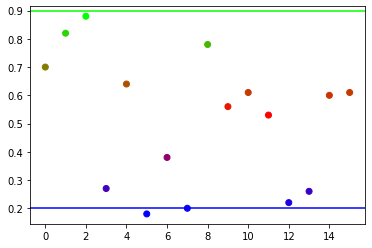

In [ ]:
from mult_pr_NN import mult_pr_NN

p = mult_pr_NN(unl,pos,X)

In [ ]:
print(p)
print(p.shape)

[[0.7 ]
 [0.82]
 [0.88]
 [0.27]
 [0.64]
 [0.18]
 [0.38]
 [0.2 ]
 [0.78]
 [0.56]
 [0.61]
 [0.53]
 [0.22]
 [0.26]
 [0.6 ]
 [0.61]]
(16, 1)


In [ ]:
s = (pos.shape[0],1)
pp = np.ones(s)

p = np.concatenate((p,pp), axis=0)
print(p.shape)

(18, 1)


In [ ]:
from prettytable import PrettyTable

t = PrettyTable(['Prob','Song'])
song_name = pd.DataFrame(df_ag['song']).to_numpy()
in_playlist = pd.DataFrame(df_ag['in playlist']).to_numpy()
print(in_playlist.shape)
print(p.shape)
song_name_p = np.concatenate((song_name,p, in_playlist),axis = 1)
song_name_p_sorted = song_name_p[song_name_p[:,1].argsort()]
song_name_p_sorted = np.flip(song_name_p_sorted, axis=None)
song_name_p_sorted = np.delete(song_name_p_sorted, np.where(song_name_p_sorted[:, 0] == 1)[0], axis=0)
song_name_p_sorted = song_name_p_sorted[:,1:]
# print(song_name_p_sorted)
for i in range(unl.shape[0]):
    t.add_row([song_name_p_sorted[i][0], song_name_p_sorted[i][1]])
print(t)

(18, 1)
(18, 1)
+------+---------------------------------------------------------------+
| Prob |                              Song                             |
+------+---------------------------------------------------------------+
| 0.88 | Balling (feat. Songer, Mr Traumatik, Devilman & OneDa) - Edit |
| 0.82 |                      That's All She Wrote                     |
| 0.78 |                            Together                           |
| 0.7  |                       Return of the Mack                      |
| 0.64 |                      Drugs From Amsterdam                     |
| 0.61 |                            I'm Back                           |
| 0.61 |                      Together - Guz Remix                     |
| 0.6  |         Roll The Dice (feat. Stamina MC & Lily Allen)         |
| 0.56 |              Stranger Things (feat. OneRepublic)              |
| 0.53 |                           St. Tropez                          |
| 0.38 |                          N

In [ ]:
df_ag['probability'] = p
df_ag.shape
rec = df_ag[df_ag['in playlist'] == -2]
rec = rec.sort_values(by=['probability'], ascending=False)
rec.to_csv('Playlist_rec.csv', encoding='utf-8', index = False)
# rec_songs = rec['uri'].values.tolist()

In [ ]:
from get_credentials import get_credentials
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

cid,secret = get_credentials()
scope = 'playlist-modify-public'
username = '12167982535'

token = SpotifyOAuth(client_id=cid, client_secret=secret, redirect_uri = 'http://localhost/', scope=scope,username=username)
sp = spotipy.Spotify(auth_manager=token)

playlist_name = input("\nWhat's the playlist name? ")
sp.user_playlist_create(username, playlist_name, public=True, description='Suggested Songs')
print(f"\nPlaylist '%s' was created successfully."%playlist_name)

# python3 -m venv spotifyplaylistgenerator
# python -m venv .env
# .env\Scripts\activate
# set SPOTIPY_CLIENT_ID=
# set SPOTIPY_CLIENT_SECRET=
# set REDIRECT_URI=http://localhost/

in txt


HTTP Error for POST to https://api.spotify.com/v1/users/12167982535/playlists with Params: {} returned 400 due to Missing required field: name


SpotifyException: http status: 400, code:-1 - https://api.spotify.com/v1/users/12167982535/playlists:
 Missing required field: name, reason: None

In [ ]:
import math
rec_songs = rec[rec['probability'] >= 0.9]

pre_playlist = sp.user_playlists(user=username)
playlist = pre_playlist['items'][0]['id']

print(len(rec_songs))
for i in range(math.floor(len(rec_songs)/100)):
    rec_songs_p = rec_songs[i*100:(i+1)*100]
    rec_songs_p= rec_songs_p['uri'].values.tolist()
    sp.user_playlist_add_tracks(user = username, playlist_id=playlist,tracks=rec_songs_p)
rec_songs_p = rec_songs[math.floor(len(rec_songs)/100)*100:(math.floor(len(rec_songs)/100)+1)*100]
rec_songs_p= rec_songs_p['uri'].values.tolist()
sp.user_playlist_add_tracks(user = username, playlist_id=playlist,tracks=rec_songs_p)


271


{'snapshot_id': 'OCxkOTlmZmJiNWZkODYzNjVmOTc0YTYxYmRjMWE3ZWRhY2IxODZmYjNm'}